In [11]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

import pickle

pickle_in = open("X2.pickle","rb")  # Open X data
X = pickle.load(pickle_in)

pickle_in = open("y2.pickle","rb")  # Open y data 
y = pickle.load(pickle_in)

X = X.astype("float32")/255.0      # Make data in range 1 or less

model = Sequential() 

# Convolutional 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
# Pooling 1
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout 1
model.add(Dropout(0.1))    

# Convolutional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
# Pooling 2
model.add(MaxPooling2D(pool_size=(2, 2))) 
# Dropout 2
model.add(Dropout(0.2)) 

# Convolutional 3
model.add(Conv2D(16, (3, 3), activation='relu'))
# Pooling 3
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout 3
model.add(Dropout(0.25)) 

# Flatten
model.add(Flatten())

# Hidden layer 1
model.add(Dense(192, activation='relu'))
# Dropout 4
model.add(Dropout(0.35)) 
# Hidden layer 2
model.add(Dense(256, activation='sigmoid'))
# Dropout 5
model.add(Dropout(0.45)) 

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile
opt = keras.optimizers.Adam(learning_rate=0.0008) # redo learining rate using hyper and redo epoches
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

history = model.fit(X, y, batch_size=16, epochs=15, validation_split=0.1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 16)         

Text(0.5, 1.0, 'Accuracy Curves')

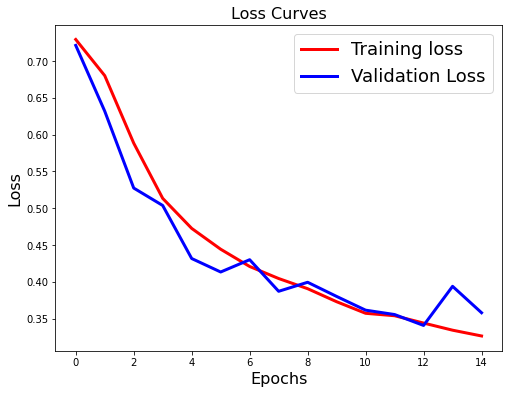

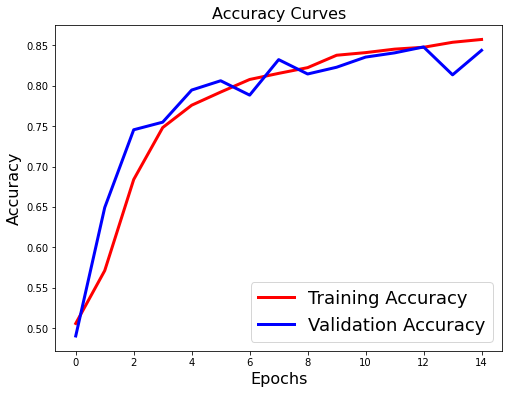

In [12]:
import matplotlib.pyplot as plt

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [9]:
model.save('CNNClassifier42.model')